In [10]:
%pylab inline
import seaborn as sns
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


/home/jebarrios/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Ejercicio 5
Un pozo de potencial unidimensional de anchura $a$ y profundidad infinita contiene electrones: en un momento dado, la densidad de probabilidad es triangular y simétrica, como se ilustra en la figura. (a) Determine la constante de normalización y el máximo valor de dicha densidad. (b) Exprese la función de onda en términos de las eigenfunciones del pozo infinito. ¿Esperaría que el estado descrito por la densidad de probabilidad triangular fuera estacionario? ¿Por qué?

<img src="BoxParticle.png" alt="Densidad de probabilidad" style="width: 400px;"/>


In [4]:
ngrid    = 10000
π        = pi
ℓ        = 1.0            # nm
x        = linspace(0.0,ℓ,ngrid)
ψ        = 2/ℓ*sqrt(x)
index    = x>ℓ/2
ψ[index] = 2/ℓ*sqrt(ℓ-x[index])
ψ2       = ψ*ψ
norm     = trapz(ψ2,x)

print ("Int|ψ|^2 = {0:.4f}".format(norm))

Int|ψ|^2 = 1.0000


## Soluciones de una partícula en una caja

In [5]:
cn = []
for n in range(1,5):
    ϕn = sqrt(2/ℓ)*sin(n*π*x/ℓ)
    cn.append( trapz(ψ*ϕn,x) )

In [6]:
Proy = zeros(ngrid)
for n in range(1,5):
    ϕn    = sqrt(2/ℓ)*sin(n*π*x/ℓ)
    Proy += cn[n-1]*ϕn
    
Proy2    = Proy*Proy
norm     = trapz(Proy2,x)
print ("Int|Proy|^2 = {0:.4f}".format(norm))

Int|Proy|^2 = 0.9922


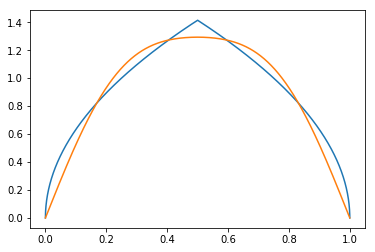

In [7]:
plot(x,ψ)
plot(x,Proy)

## Using interactive

In [40]:
nbase = 20
cn = []
for n in range(1,nbase):
    ϕn = sqrt(2/ℓ)*sin(n*π*x/ℓ)
    cn.append( trapz(ψ*ϕn,x) )

In [41]:
Proy_n = []
Proy   = zeros(ngrid)
for n in range(1,nbase):
    ϕn    = sqrt(2/ℓ)*sin(n*π*x/ℓ)
    Proy += cn[n-1]*ϕn
    Proy_n.append(array(Proy))
    
Proy_n   = array(Proy_n)
Proy2    = Proy*Proy
norm     = trapz(Proy2,x)

print ("Int|Proy|^2 = {0:.4f}".format(norm))

Int|Proy|^2 = 0.9997


In [43]:
@interact(n=(1,nbase-1))
def Series(n=1):
    fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(16,5))
    
    nval = arange(len(cn))+1
    axes[0].scatter(nval+1,cn)
    axes[0].set_yscale('log')
    axes[0].set_ylim(1e-7,1e2)
    axes[0].scatter(nval[n],cn[n-1])

    axes[0].set_xlim(0,nbase+1)
    
    axes[1].plot(x,ψ)
    axes[1].plot(x,Proy_n[n-1],label='{0}'.format(n))
    
    return

interactive(children=(IntSlider(value=1, description='n', max=19, min=1), Output()), _dom_classes=('widget-interact',))